## HOUSE DATA PRICE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


## Chargement des données

In [2]:
train = pd.read_csv('D:/DevDataAI/Python/laurent Cours/Machine learning/Microsoft Azure/Projet/all/train.csv')
test = pd.read_csv('D:/DevDataAI/Python/laurent Cours/Machine learning/Microsoft Azure/Projet/all//test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Paramètres de visualisation pour jupyter

In [5]:
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 100

## Exploration des données

In [6]:
# enregistrer l'index et 
train_id = train['Id']
test_id = test['Id']

# suppression de l'Id
train.drop(columns ='Id', axis=1, inplace=True)
test.drop(columns ='Id', axis=1, inplace=True)

# sauvegarde du nombre de ligne du train et du test
n_train = train.shape[0]
n_test = test.shape[0]

# mettre le SalePrice le target dans une variable a part
y_train = train.SalePrice

# suppression de la colonne SalePrice
train.drop(['SalePrice'], axis=1, inplace=True)

In [7]:
#concatenation des data train et test
df_inter = pd.concat((train, test)).reset_index(drop=True)

## Gestion des données manquantes
Visualisation des données manquantes

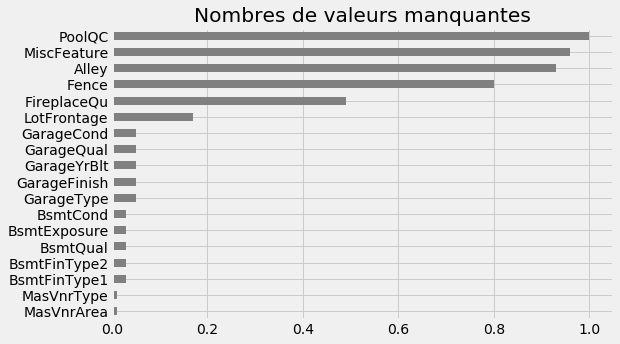

In [8]:
total_na = round((df_inter.isna().sum().sort_values())/df_inter.shape[0], 2)
col_miss_values = (total_na[total_na > 0]).index
total_na[col_miss_values].plot(kind='barh',color='grey',figsize=(8,5),title="Nombres de valeurs manquantes")

On décide de supprimer les colonnes contenant plus de 15% de valeurs manquantes

In [9]:
cols_low_na = total_na[total_na < 0.15]
df_inter = df_inter[cols_low_na.index]

## Gestion des valeurs manquantes
- Que faire du GarageYrBlt ?
- Bsmt => Vérifier qu'il  n'y a pas de basement

### Question 1
Les variables restantes sont-elles corrélées à notre prédiction ? -> Visualisation boxplot pour les qualitatives et scatterplot pour les quantitatives ( --> matrice de corrélation )<br>
### Question 2
Est-ce que des variables nous apporte la même information ? -> Visualisation plot de corrélation ( --> matrice de corrélation )

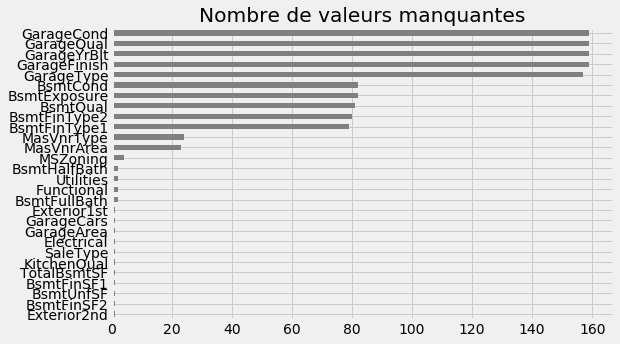

In [10]:
total_na = df_inter.isna().sum().sort_values()
total_na[total_na > 0].plot(kind='barh',color='grey',figsize=(8,5),title="Nombre de valeurs manquantes")

### ( A CONFIRMER )
Le nombre de valeurs manquantes sont les mêmes pour les variables *Garage_*. Le manque d'informations provient de l'inexistence du Garage.
<br><br>
On décide de remplacer les n/a qualitatifs par un label "N/A"

In [11]:
# cols_replace_na_cat = ["GarageCond","GarageType","GarageFinish","GarageQual"]
# df_train[cols_replace_na_cat] = df_train[cols_replace_na_cat].fillna('N/A')

In [12]:
cols_replace_na_cat = ["GarageCond","GarageType","GarageFinish","GarageQual"]
for i in cols_replace_na_cat:
    df_inter[i].fillna('N/A', inplace=True)

In [13]:
cols_replace_na_num =['GarageCars','GarageYrBlt','MasVnrArea','GarageArea']
for i in cols_replace_na_num:
    df_inter[i].fillna(0, inplace=True)

## Reconstitution de la data

In [14]:
train_clean = df_inter[:n_train]
test_clean = df_inter[n_train:]

train_clean = pd.concat((train_clean, y_train), axis=1).reset_index(drop=True)
train_clean.head()

,MSSubClass,Foundation,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ExterCond,ExterQual,HeatingQC,SaleCondition,YearBuilt,YearRemodAdd,RoofStyle,HouseStyle,RoofMatl,BldgType,Condition2,Condition1,Neighborhood,LandSlope,LotConfig,LandContour,LotShape,Street,LotArea,OverallCond,OverallQual,GarageCars,GarageArea,KitchenQual,Electrical,SaleType,Exterior1st,TotalBsmtSF,BsmtUnfSF,Exterior2nd,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,Functional,Utilities,BsmtHalfBath,MSZoning,MasVnrArea,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtExposure,BsmtCond,GarageType,GarageFinish,GarageYrBlt,GarageQual,GarageCond,SalePrice
0,60,PConc,GasA,Y,856,854,0,1710,2,1,3,1,8,0,Y,0,61,0,0,0,0,0,2,2008,TA,Gd,Ex,Normal,2003,2003,Gable,2Story,CompShg,1Fam,Norm,Norm,CollgCr,Gtl,Inside,Lvl,Reg,Pave,8450,5,7,2.0,548.0,Gd,SBrkr,WD,VinylSd,856.0,150.0,VinylSd,706.0,0.0,1.0,Typ,AllPub,0.0,RL,196.0,BrkFace,GLQ,Unf,Gd,No,TA,Attchd,RFn,2003.0,TA,TA,208500
1,20,CBlock,GasA,Y,1262,0,0,1262,2,0,3,1,6,1,Y,298,0,0,0,0,0,0,5,2007,TA,TA,Ex,Normal,1976,1976,Gable,1Story,CompShg,1Fam,Norm,Feedr,Veenker,Gtl,FR2,Lvl,Reg,Pave,9600,8,6,2.0,460.0,TA,SBrkr,WD,MetalSd,1262.0,284.0,MetalSd,978.0,0.0,0.0,Typ,AllPub,1.0,RL,0.0,None,ALQ,Unf,Gd,Gd,TA,Attchd,RFn,1976.0,TA,TA,181500
2,60,PConc,GasA,Y,920,866,0,1786,2,1,3,1,6,1,Y,0,42,0,0,0,0,0,9,2008,TA,Gd,Ex,Normal,2001,2002,Gable,2Story,CompShg,1Fam,Norm,Norm,CollgCr,Gtl,Inside,Lvl,IR1,Pave,11250,5,7,2.0,608.0,Gd,SBrkr,WD,VinylSd,920.0,434.0,VinylSd,486.0,0.0,1.0,Typ,AllPub,0.0,RL,162.0,BrkFace,GLQ,Unf,Gd,Mn,TA,Attchd,RFn,2001.0,TA,TA,223500
3,70,BrkTil,GasA,Y,961,756,0,1717,1,0,3,1,7,1,Y,0,35,272,0,0,0,0,2,2006,TA,TA,Gd,Abnorml,1915,1970,Gable,2Story,CompShg,1Fam,Norm,Norm,Crawfor,Gtl,Corner,Lvl,IR1,Pave,9550,5,7,3.0,642.0,Gd,SBrkr,WD,Wd Sdng,756.0,540.0,Wd Shng,216.0,0.0,1.0,Typ,AllPub,0.0,RL,0.0,None,ALQ,Unf,TA,No,Gd,Detchd,Unf,1998.0,TA,TA,140000
4,60,PConc,GasA,Y,1145,1053,0,2198,2,1,4,1,9,1,Y,192,84,0,0,0,0,0,12,2008,TA,Gd,Ex,Normal,2000,2000,Gable,2Story,CompShg,1Fam,Norm,Norm,NoRidge,Gtl,FR2,Lvl,IR1,Pave,14260,5,8,3.0,836.0,Gd,SBrkr,WD,VinylSd,1145.0,490.0,VinylSd,655.0,0.0,1.0,Typ,AllPub,0.0,RL,350.0,BrkFace,GLQ,Unf,Gd,Av,TA,Attchd,RFn,2000.0,TA,TA,250000


## Séléction de features
Visualisations des corrélations

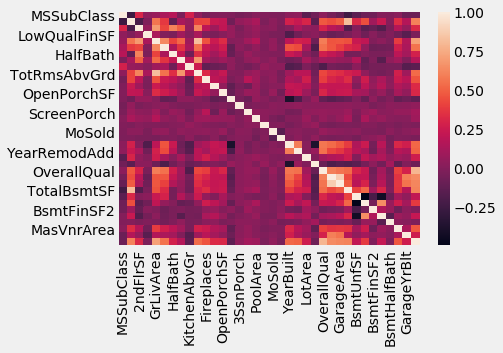

In [15]:
sns.heatmap(train_clean.corr())

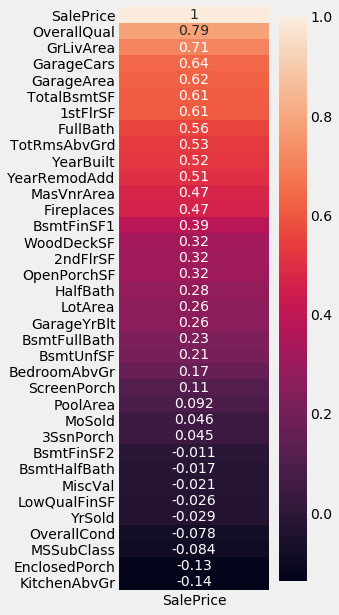

In [16]:
corr_price = train_clean.corr()[['SalePrice']].sort_values('SalePrice',ascending=False)
plt.figure(figsize=(3,10))
sns.heatmap(corr_price,annot=True)

On garde les variables quantitatives corrélées à plus de 25%

In [17]:
corr_price = train_clean.corr()['SalePrice']
cols_features = corr_price[corr_price > 0.25].index
train_clean = train_clean[cols_features]

## Création de features

Visualisations des corrélations

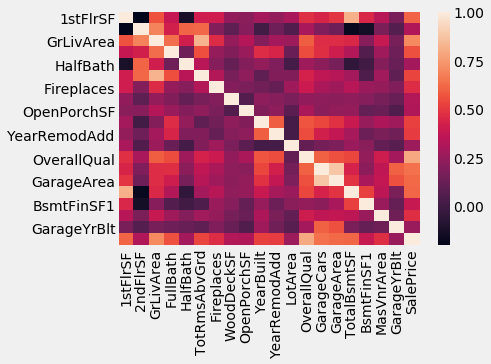

In [18]:
sns.heatmap(train_clean.corr())

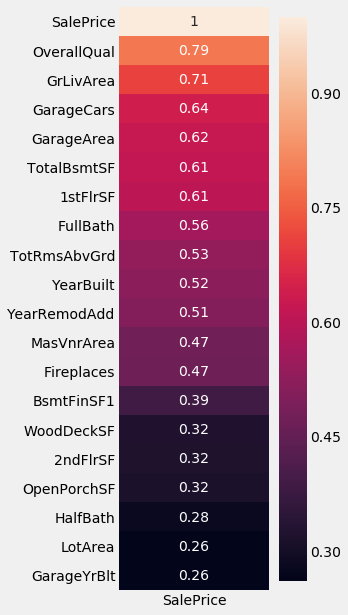

In [19]:
corr_price = train_clean.corr()[['SalePrice']].sort_values('SalePrice',ascending=False)
plt.figure(figsize=(3,10))
sns.heatmap(corr_price,annot=True)

On garde les variables quantitatives corrélées à plus de 25%

In [20]:
corr_price = train_clean.corr()['SalePrice']
cols_features = corr_price[corr_price > 0.25].index
train_clean = train_clean[cols_features]
train_clean.head()

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,YearBuilt,YearRemodAdd,LotArea,OverallQual,GarageCars,GarageArea,TotalBsmtSF,BsmtFinSF1,MasVnrArea,GarageYrBlt,SalePrice
0,856,854,1710,2,1,8,0,0,61,2003,2003,8450,7,2.0,548.0,856.0,706.0,196.0,2003.0,208500
1,1262,0,1262,2,0,6,1,298,0,1976,1976,9600,6,2.0,460.0,1262.0,978.0,0.0,1976.0,181500
2,920,866,1786,2,1,6,1,0,42,2001,2002,11250,7,2.0,608.0,920.0,486.0,162.0,2001.0,223500
3,961,756,1717,1,0,7,1,0,35,1915,1970,9550,7,3.0,642.0,756.0,216.0,0.0,1998.0,140000
4,1145,1053,2198,2,1,9,1,192,84,2000,2000,14260,8,3.0,836.0,1145.0,655.0,350.0,2000.0,250000


In [21]:
train_clean.columns

Index(['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'YearBuilt',
       'YearRemodAdd', 'LotArea', 'OverallQual', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'BsmtFinSF1', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'],
      dtype='object')

In [22]:
#Suppresion des colonnes 1rstFloor, 2ndFloor,GarageArea,
train_clean=train_clean.drop(['1stFlrSF', '2ndFlrSF','GarageArea','GarageYrBlt'],axis=1)
train_clean


,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,YearBuilt,YearRemodAdd,LotArea,OverallQual,GarageCars,TotalBsmtSF,BsmtFinSF1,MasVnrArea,SalePrice
0,1710,2,1,8,0,0,61,2003,2003,8450,7,2.0,856.0,706.0,196.0,208500
1,1262,2,0,6,1,298,0,1976,1976,9600,6,2.0,1262.0,978.0,0.0,181500
2,1786,2,1,6,1,0,42,2001,2002,11250,7,2.0,920.0,486.0,162.0,223500
3,1717,1,0,7,1,0,35,1915,1970,9550,7,3.0,756.0,216.0,0.0,140000
4,2198,2,1,9,1,192,84,2000,2000,14260,8,3.0,1145.0,655.0,350.0,250000
5,1362,1,1,5,0,40,30,1993,1995,14115,5,2.0,796.0,732.0,0.0,143000
6,1694,2,0,7,1,255,57,2004,2005,10084,8,2.0,1686.0,1369.0,186.0,307000
7,2090,2,1,7,2,235,204,1973,1973,10382,7,2.0,1107.0,859.0,240.0,200000
8,1774,2,0,8,2,90,0,1931,1950,6120,7,2.0,952.0,0.0,0.0,129900
9,1077,1,0,5,2,0,4,1939,1950,7420,5,1.0,991.0,851.0,0.0,118000


In [23]:
train_clean.columns

Index(['GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'WoodDeckSF', 'OpenPorchSF', 'YearBuilt', 'YearRemodAdd', 'LotArea',
       'OverallQual', 'GarageCars', 'TotalBsmtSF', 'BsmtFinSF1', 'MasVnrArea',
       'SalePrice'],
      dtype='object')

In [24]:
train_clean.dtypes

GrLivArea         int64
FullBath          int64
HalfBath          int64
TotRmsAbvGrd      int64
Fireplaces        int64
WoodDeckSF        int64
OpenPorchSF       int64
YearBuilt         int64
YearRemodAdd      int64
LotArea           int64
OverallQual       int64
GarageCars      float64
TotalBsmtSF     float64
BsmtFinSF1      float64
MasVnrArea      float64
SalePrice         int64
dtype: object

## Transformations de valeurs

In [25]:
train_clean['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [26]:
#Transformation des colonnes 'YearBuilt','YearRemodAdd'
train_clean['YearBuilt'] = train_clean['YearBuilt'].apply(str)
train_clean['YearRemodAdd'] = train_clean['YearRemodAdd'].apply(str)
train_clean.head()

,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,YearBuilt,YearRemodAdd,LotArea,OverallQual,GarageCars,TotalBsmtSF,BsmtFinSF1,MasVnrArea,SalePrice
0,1710,2,1,8,0,0,61,2003,2003,8450,7,2.0,856.0,706.0,196.0,208500
1,1262,2,0,6,1,298,0,1976,1976,9600,6,2.0,1262.0,978.0,0.0,181500
2,1786,2,1,6,1,0,42,2001,2002,11250,7,2.0,920.0,486.0,162.0,223500
3,1717,1,0,7,1,0,35,1915,1970,9550,7,3.0,756.0,216.0,0.0,140000
4,2198,2,1,9,1,192,84,2000,2000,14260,8,3.0,1145.0,655.0,350.0,250000


In [27]:
#Transformation des float  en int
train_clean['GarageCars'] = train_clean['GarageCars'].apply(int)
train_clean['TotalBsmtSF'] = train_clean['TotalBsmtSF'].apply(int)
train_clean['BsmtFinSF1'] = train_clean['BsmtFinSF1'].apply(int)
train_clean['MasVnrArea'] = train_clean['MasVnrArea'].apply(int)


In [31]:
#Transformation en catégorial

label_encoder = LabelEncoder()
train_clean['YearBuilt'] = label_encoder.fit_transform(train_clean['YearBuilt'])
train_clean['YearRemodAdd']=label_encoder.fit_transform(train_clean['YearRemodAdd'])
train_clean


,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,YearBuilt,YearRemodAdd,LotArea,OverallQual,GarageCars,TotalBsmtSF,BsmtFinSF1,MasVnrArea,SalePrice
0,1710,2,1,8,0,0,61,104,53,8450,7,2,856,706,196,208500
1,1262,2,0,6,1,298,0,77,26,9600,6,2,1262,978,0,181500
2,1786,2,1,6,1,0,42,102,52,11250,7,2,920,486,162,223500
3,1717,1,0,7,1,0,35,19,20,9550,7,3,756,216,0,140000
4,2198,2,1,9,1,192,84,101,50,14260,8,3,1145,655,350,250000
5,1362,1,1,5,0,40,30,94,45,14115,5,2,796,732,0,143000
6,1694,2,0,7,1,255,57,105,55,10084,8,2,1686,1369,186,307000
7,2090,2,1,7,2,235,204,74,23,10382,7,2,1107,859,240,200000
8,1774,2,0,8,2,90,0,35,0,6120,7,2,952,0,0,129900
9,1077,1,0,5,2,0,4,42,0,7420,5,1,991,851,0,118000


## Gestion des outliers

## Modèle d'apprentissage
- Définir un seuil final pour le test_size
- On a temporairement retiré *GarageYrBlt* et *MasVnrArea* dû aux valeurs manquantes non traitées

In [32]:
Y = train_clean['SalePrice']
X = train_clean.drop(['SalePrice'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.predict(X_test)
lm.score(X_test,y_test)

0.8104872176974618